***P-81 Air Quality forecasting(CO2 emissions) ***

**Business Objective:**
To forecast Co2 levels for an organization so that the organization can follow government norms with respect to Co2 emission levels.


In [1]:
##import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import log
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
##load the datasets
data= pd.read_excel('/content/CO2 dataset.xlsx',parse_dates=True)


In [5]:
data.head()

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542
...,...,...
210,2010,15.60000
211,2011,15.60000
212,2012,14.80000
213,2013,14.70000


# **EXPLORATORY DATA ANALYSIS**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    int64  
 1   CO2     215 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.5 KB


**DESCRIPTIVE STATISTICS**

In [7]:
data.describe()

,Year,CO2
count,215.000000,215.000000
mean,1907.000000,6.741970
std,62.209324,6.522437
min,1800.000000,0.001750
25%,1853.500000,0.041050
50%,1907.000000,6.390000
75%,1960.500000,11.500000
max,2014.000000,18.200000


**MISSING VALUES & IMPUTATION**

In [8]:
## Checking for Null values

data.isnull().sum()

Year    0
CO2     0
dtype: int64

In [9]:
#No column is having null values

In [10]:
## Visualisation of null values 
import seaborn as sns
cols=data.columns

In [11]:
colours=['#000099','#ffff00']

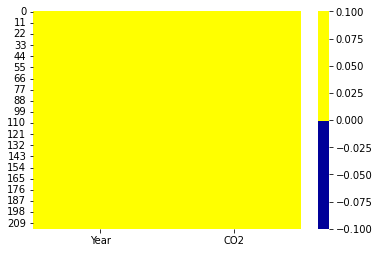

In [12]:
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

In [13]:
## there is no missing values.

**TO FIND DUPLICATED records**

In [14]:
 ##CHECKING FOR DUPLICATED ROWS
 data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
210    False
211    False
212    False
213    False
214    False
Length: 215, dtype: bool

In [15]:
data[ data.duplicated()].shape

(0, 2)

**there are no duplicated records**

**VISUALISATIONS**

**1. line plot**

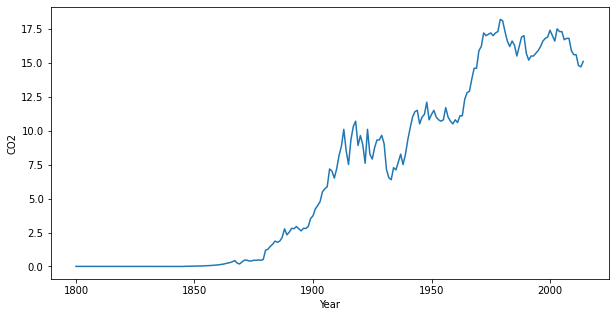

In [16]:
##line plot
plt.figure(figsize=(10,5))
sns.lineplot(x="Year",y="CO2",data=data)

**2. HISTOGRAM- Outlier detection**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb39c4bc50>,
      dtype=object)

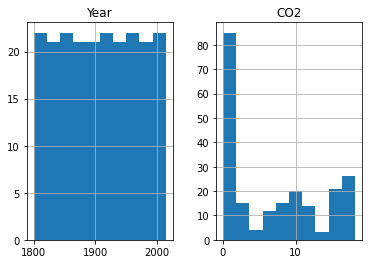

In [17]:
#USING HISTOGRAM
data.hist()

**3. BOXPLOT Outlier detection**

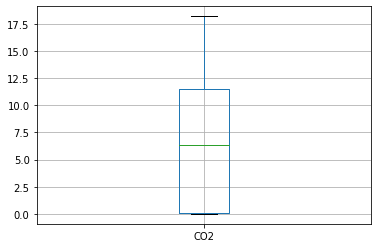

In [18]:
data.boxplot(column='CO2')

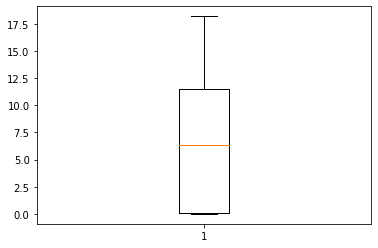

In [19]:
##boxplot
box = plt.boxplot(data.CO2)

In [20]:
## TO GET FLIERS(OUTLIERS):
[item.get_ydata() for item in box['fliers']]

[array([], dtype=float64)]

In [21]:
[item.get_ydata() for item in box['whiskers']]

[array([0.04105, 0.00175]), array([11.5, 18.2])]

**there are no outliers to treat**

**4. Distribution plot**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


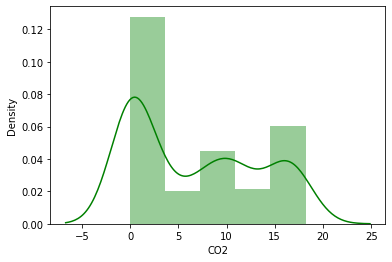

In [22]:
# Distribution plot for 'CO2'
sns.distplot(data['CO2'], color='green');

**CO2 levels is right skewed , Most of the levels lies in between 0-18**

**5. Scatter plot**

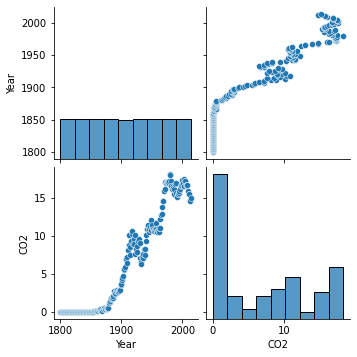

In [23]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data)

**6. DENSITY PLOTS**

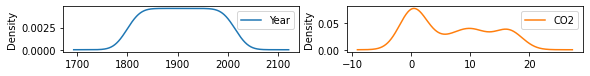

In [24]:
data.plot(kind='density',
          figsize=(50,50),
          subplots=True, 
          layout=(50,10),
          sharex=False,
          )
plt.show()

**CORRELATION ANALYSIS**

In [25]:
#Correlation
data.corr()

,Year,CO2
Year,1.000000,0.951243
CO2,0.951243,1.000000


**7. HEAT MAP FOR CORRELATION**

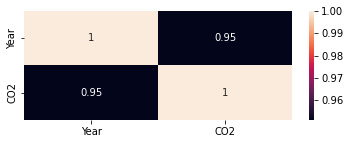

In [26]:
#### HEAT MAP FOR CORRELATION
plt.figure(figsize=(6,2))
sns.heatmap(data.corr(),annot=True)
plt.show()


**8.Lag plot--ACF plot**

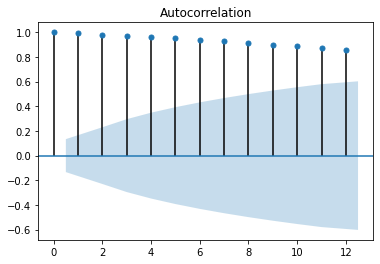

In [27]:
### to bring out the possible association between successive samples
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.CO2,lags=12)
plt.show()

**9.PACF plot**

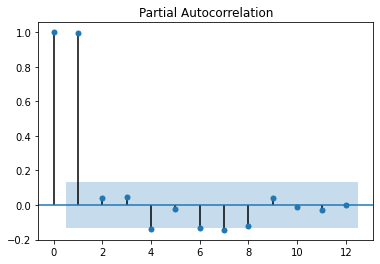

In [28]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_pacf(data.CO2,lags=12)
plt.show()

**Log transformation**

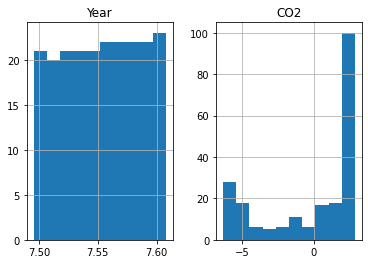

In [29]:
## histogram
data_log = log(data)
data_log.hist()
plt.show()

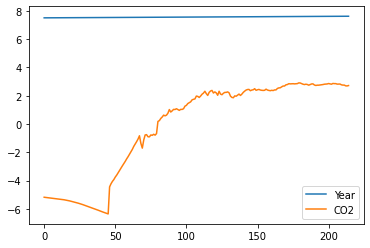

In [30]:
##line plot
data_log.plot()

# **TIME SERIES TRANSFORMATIONS**

In [3]:
data_1=data.copy()
data_1.head()

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542


In [4]:
data_1["t"] = np.arange(1,216)
data_1["t_squared"] = data_1["t"]*data_1["t"]
data_1["log_CO2"] = np.log(data_1["CO2"])
data_1.columns

Index(['Year', 'CO2', 't', 't_squared', 'log_CO2'], dtype='object')

In [33]:
data_1.head()

,Year,CO2,t,t_squared,log_CO2
0,1800,0.00568,1,1,-5.170804
1,1801,0.00561,2,4,-5.183205
2,1802,0.00555,3,9,-5.193957
3,1803,0.00548,4,16,-5.206650
4,1804,0.00542,5,25,-5.217659


In [5]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       215 non-null    int64  
 1   CO2        215 non-null    float64
 2   t          215 non-null    int64  
 3   t_squared  215 non-null    int64  
 4   log_CO2    215 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 8.5 KB


**1. LINE PLOT**

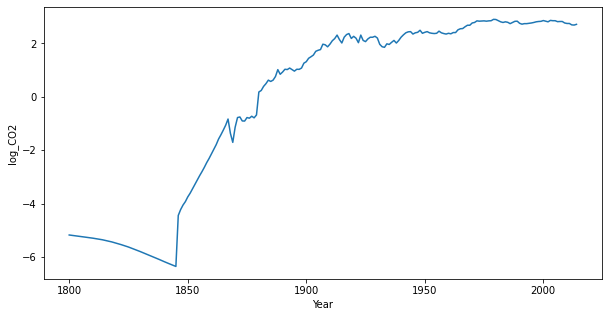

In [6]:
##line plot
plt.figure(figsize=(10,5))
sns.lineplot(x="Year",y="log_CO2",data=data_1)

**2. HISTOGRAM- Outlier detection**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f15d4bdbc10>,
      dtype=object)

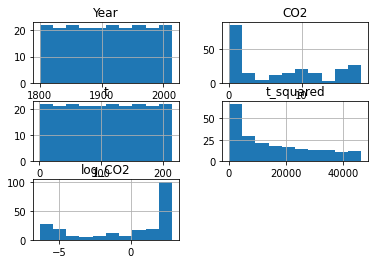

In [7]:
#USING HISTOGRAM
data_1.hist()

**3.DENSITY PLOT**

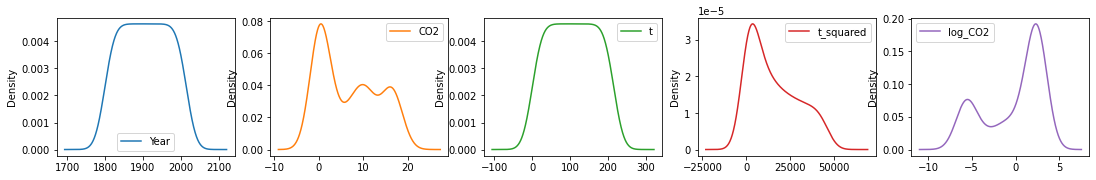

In [37]:
data_1.plot(kind='density',figsize=(30,30),subplots=True,layout=(10,8),sharex=False)
plt.show()

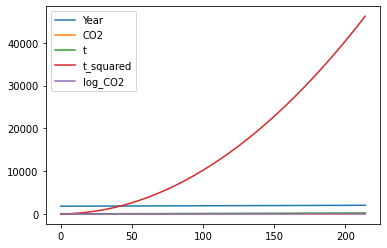

In [38]:
data_1.plot()

# **DATA_DRIVEN_METHODS**

### **SMOOTHING TECHNIQUES**

In [26]:
Train = data_1.head(214)
Test = data_1.tail(1)

**1. Moving Average plot--CO2**

Text(0.5, 1.0, 'MOVING AVERAGE---CO2')

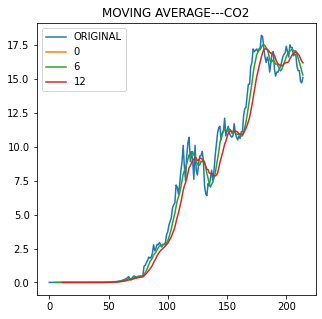

In [13]:
plt.figure(figsize=(5,5))
data_1.CO2.plot(label="ORIGINAL")
for i in range(0,18,6):
    data_1["CO2"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.title("MOVING AVERAGE---CO2")

**1. Moving Average plot--log_CO2**

Text(0.5, 1.0, 'MOVING AVERAGE--logCO2')

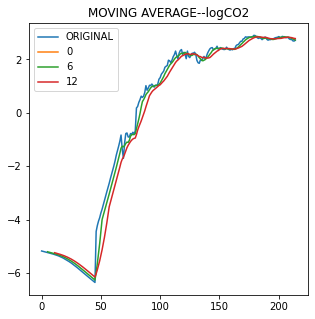

In [12]:
plt.figure(figsize=(5,5))
data_1.log_CO2.plot(label="ORIGINAL")
for i in range(0,18,6):
    data_1["log_CO2"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.title("MOVING AVERAGE--logCO2")

**2. Moving Standard Deviation plot--CO2**

Text(0.5, 1.0, 'MOVING STANDARD DEVIATION--CO2')

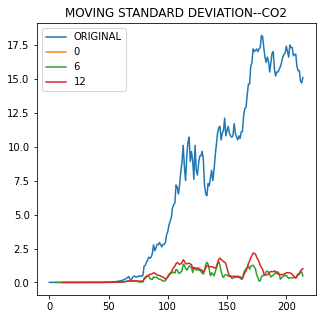

In [16]:
plt.figure(figsize=(5,5))
data_1.CO2.plot(label="ORIGINAL")
for i in range(0,18,6):
    data_1["CO2"].rolling(i).std().plot(label=str(i))
plt.legend(loc='best')
plt.title("MOVING STANDARD DEVIATION--CO2")

**2. Moving Standard Deviation plot--log_CO2**

Text(0.5, 1.0, 'MOVING STANDARD DEVIATION--log_CO2')

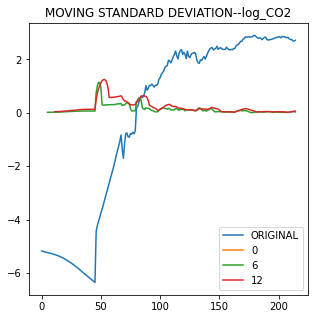

In [17]:
plt.figure(figsize=(5,5))
data_1.log_CO2.plot(label="ORIGINAL")
for i in range(0,18,6):
    data_1["log_CO2"].rolling(i).std().plot(label=str(i))
plt.legend(loc='best')
plt.title("MOVING STANDARD DEVIATION--log_CO2")

In [42]:
## THE CURVE HAS BEEN SMOOTHENED

**2.Time series decomposition plot-CO2**

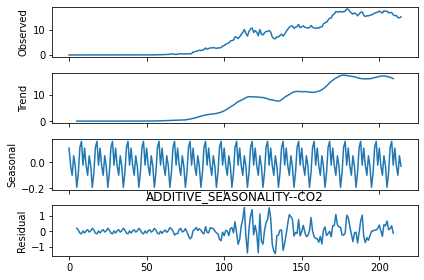

In [20]:
### ADDITIVE_SEASONALITY
decompose_ts_add = seasonal_decompose(data_1.CO2,freq=10, model='additive')
decompose_ts_add.plot()
plt.title("ADDITIVE_SEASONALITY--CO2")
plt.show()


**2.Time series decomposition plot-log_CO2**

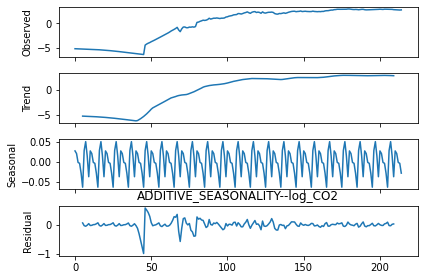

In [21]:
### ADDITIVE_SEASONALITY
decompose_ts_add = seasonal_decompose(data_1.log_CO2,freq=10, model='additive')
decompose_ts_add.plot()
plt.title("ADDITIVE_SEASONALITY--log_CO2")
plt.show()


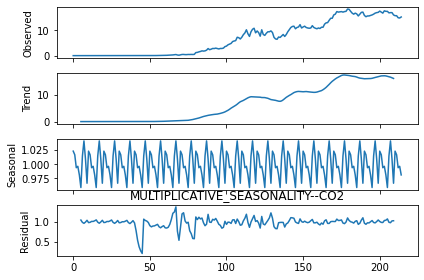

In [22]:
## MULTIPLICATIVE_SEASONALITY-----CO2
decompose_ts_add = seasonal_decompose(data_1.CO2,freq=10, model='multiplicative')
decompose_ts_add.plot()
plt.title("MULTIPLICATIVE_SEASONALITY--CO2")
plt.show()

In [70]:
## MULTIPLICATIVE_SEASONALITY----log_CO2
decompose_ts_add = seasonal_decompose(data_1.log_CO2,freq=10, model='multiplicative')
decompose_ts_add.plot()
plt.title("MULTIPLICATIVE_SEASONALITY")
plt.show()

ValueError: ignored

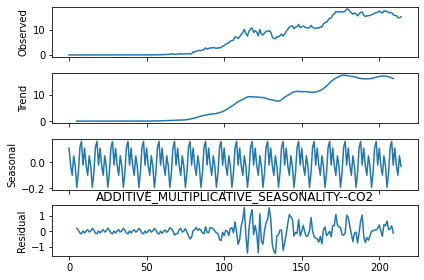

In [23]:
### ADDITIVE_MULTIPLICATIVE_SEASONALITY---CO2
decompose_ts_add = seasonal_decompose(data_1.CO2,freq=10, model='add_mult')
decompose_ts_add.plot()
plt.title("ADDITIVE_MULTIPLICATIVE_SEASONALITY--CO2")
plt.show()

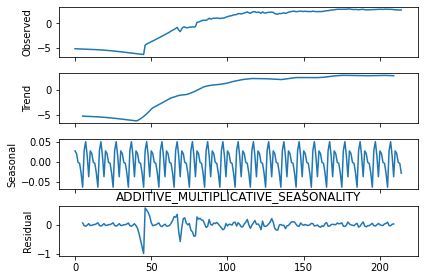

In [24]:
### ADDITIVE_MULTIPLICATIVE_SEASONALITY---log_CO2
decompose_ts_add = seasonal_decompose(data_1.log_CO2,freq=10, model='add_mult')
decompose_ts_add.plot()
plt.title("ADDITIVE_MULTIPLICATIVE_SEASONALITY")
plt.show()

# **DICKEY-FULLER TEST**

**Null Hypothesis (H0):** If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

**Alternate Hypothesis (H1):** The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

**p-value > 0.05:** Fail to reject the null hypothesis (H0), the data has a unit root and is **non-stationary**.

**p-value <= 0.05:** Reject the null hypothesis (H0), the data does not have a unit root and is **stationary**.

In [74]:
#perform Dickey fuller Test:
from statsmodels.tsa.stattools import adfuller

df_test = adfuller(data_1["CO2"],autolag='AIC')

df_output = pd.Series(df_test[0:4], index=["Test Statistic:","p-value:","3Lags used:" ,"No.Of.Observations Used:"])
for key,value in df_test [4].items():
   df_output["Critical Value (%s)" %key]=value

print(df_output)

Test Statistic:              -0.378463
p-value:                      0.913633
3Lags used:                   0.000000
No.Of.Observations Used:    214.000000
Critical Value (1%)          -3.461282
Critical Value (5%)          -2.875143
Critical Value (10%)         -2.574020
dtype: float64


**p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.**

**Comparing the test statistic to the critical values, it looks like we would have to fail to reject the null hypothesis that the time series is non-stationary and does have time-dependent structure.**

**Let’s log transform the dataset again to make the distribution of values more linear and better meet the expectations of this statistical test.**

In [75]:
from statsmodels.tsa.stattools import adfuller

df_test = adfuller(data_1["log_CO2"],autolag='AIC')

df_output = pd.Series(df_test[0:4], index=["Test Statistic:","p-value:","3Lags used:" ,"No.Of.Observations Used:"])
for key,value in df_test [4].items():
   df_output["Critical Value (%s)" %key]=value

print(df_output)

Test Statistic:              -1.342231
p-value:                      0.609637
3Lags used:                   1.000000
No.Of.Observations Used:    213.000000
Critical Value (1%)          -3.461429
Critical Value (5%)          -2.875207
Critical Value (10%)         -2.574054
dtype: float64


**p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.**

**Comparing the test statistic to the critical values, 
it looks like we would have to fail to reject the null hypothesis that the time series is non-stationary and does have time-dependent structure.**

# **Exponential Smoothing**

**Evaluation Metric MAPE**

In [28]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp) 

**1.SIMPLE EXPONENTIAL SMOOTHING METHOD**

In [77]:
ses_model = SimpleExpSmoothing(Train["CO2"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.CO2) 

4.221381908607472

**1.SIMPLE EXPONENTIAL SMOOTHING METHOD---log_CO2**



In [78]:
ses_model = SimpleExpSmoothing(Train["log_CO2"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.CO2) 

81.75923973152716

**2. HOLT'S SMOOTHING METHOD--CO2**

In [50]:
# Holt method 
hw_model = Holt(Train["CO2"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.CO2) 

4.541420575930628

**2. HOLT'S SMOOTHING METHOD--log_CO2**

In [79]:
# Holt method 
hw_model = Holt(Train["log_CO2"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.CO2) 

82.31951039372129

## **3. Holts winter exponential smoothing with additive seasonality and additive trend**

In [30]:
 #add the trend to the model
 hwe_model_add_add = ExponentialSmoothing(Train["CO2"],
                                         seasonal="add",trend="add",
                                          seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.CO2) 

2.7995288575815147

## **3. Holts winter exponential smoothing with additive seasonality and additive trend---log_CO2**

In [29]:
#add the trend to the model
hwe_model_add_add = ExponentialSmoothing(Train["log_CO2"],
                                         seasonal="add",trend="add",
                                         seasonal_periods=12).fit() 
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.CO2) 

82.29881021557533

# **4. Holts winter exponential smoothing with multiplicative seasonality and additive trend**

In [52]:
hwe_model_mul_add = ExponentialSmoothing(Train["CO2"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.CO2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


4.932953256986453

# **4. Holts winter exponential smoothing with multiplicative seasonality and additive trend---log_CO2**

In [81]:
hwe_model_mul_add = ExponentialSmoothing(Train["log_CO2"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.CO2)

ValueError: ignored

In [53]:
### by the plot and the output and by Comparing above smoothing methods,  Holts winter exponential smoothing with additive seasonality and additive trend has the least value.

# **MODEL_BASED_FORECATING_METHODS**

# **1. Linear Model**

In [54]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('CO2~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['CO2'])-np.array(pred_linear))**2))
rmse_linear


2.3571212570751694

# **2. Exponential Model**

In [55]:
#Exponential

Exp = smf.ols('log_CO2~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['CO2'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

145.96667863134013

# **3. Quadratic Model**

In [56]:
#Quadratic 

Quad = smf.ols('CO2~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['CO2'])-np.array(pred_Quad))**2))
rmse_Quad

4.92723675524851

# **ARIMA MODEL**

In [31]:
# Import libraries
import pandas as pd
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [32]:
data_arima = pd.read_excel('/content/CO2 dataset.xlsx', 
                           header=0, index_col=0,
                           parse_dates=True)

In [33]:
data_arima.head()

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542


**1.LINE PLOT**

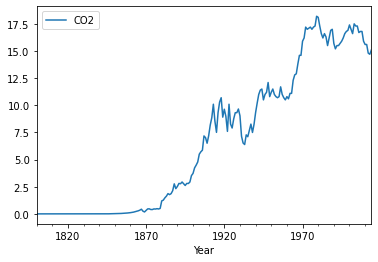

In [ ]:
# line plot of time series
from matplotlib import pyplot
data_arima.plot()
pyplot.show()

**2. HISTOGRAM**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5198242690>]],
      dtype=object)

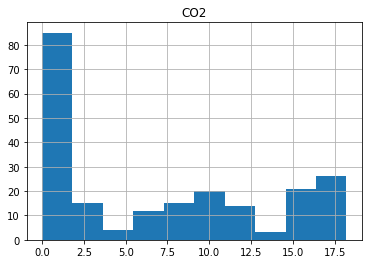

In [ ]:
data_arima.hist()

**3.DENSITY PLOT**

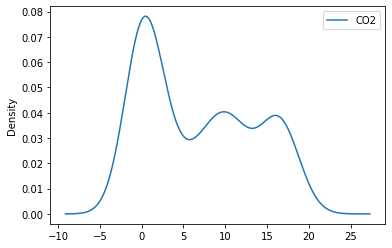

In [ ]:
data_arima.plot(kind='kde')

# **Splitting Of Data**

In [34]:
# separate out a validation dataset
split_point = len(data_arima) - 10
dataset, validation = data_arima[0:split_point], data_arima[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)


Dataset 205, Validation 10


# Persistence/ Base model

In [35]:
 # evaluate a persistence model
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = pd.read_csv('dataset.csv', header=None, 
                    index_col=0, parse_dates=True,squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [ ]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)


# **RMSE for Persistence/ Base model: 0.769**

# **ARIMA Hyperparameters Tuning**

In [37]:
import warnings
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):

# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]

# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)

# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])

# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [ ]:
# grid search ARIMA parameters for a time series

# **Grid search for p,d,q values**

In [39]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

    # load dataset
train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)

# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)


ARIMA(0, 0, 0) RMSE=8.894
ARIMA(0, 0, 1) RMSE=4.724
ARIMA(0, 1, 0) RMSE=0.763
ARIMA(0, 1, 1) RMSE=0.794
ARIMA(0, 1, 2) RMSE=0.800
ARIMA(0, 1, 3) RMSE=0.822
ARIMA(0, 1, 4) RMSE=0.830
ARIMA(0, 2, 0) RMSE=1.108
ARIMA(0, 2, 1) RMSE=0.777
ARIMA(1, 0, 0) RMSE=0.774
ARIMA(1, 1, 0) RMSE=0.785
ARIMA(1, 2, 0) RMSE=1.007
ARIMA(2, 0, 0) RMSE=0.937
ARIMA(2, 1, 0) RMSE=0.799
ARIMA(2, 2, 0) RMSE=0.928
ARIMA(3, 0, 0) RMSE=0.804
ARIMA(3, 1, 0) RMSE=0.820
ARIMA(3, 2, 0) RMSE=0.934
ARIMA(4, 1, 0) RMSE=0.843
ARIMA(4, 2, 0) RMSE=0.909
Best ARIMA(0, 1, 0) RMSE=0.763


**Best ARIMA(0, 1, 0) RMSE=0.763**

# **Build Model based on the optimized values**

In [40]:
# save finalized model to file

from statsmodels.tsa.arima_model import ARIMA
import numpy


In [41]:
# load data
train = pd.read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)

# prepare data
X = train.values
X = X.astype('float32')

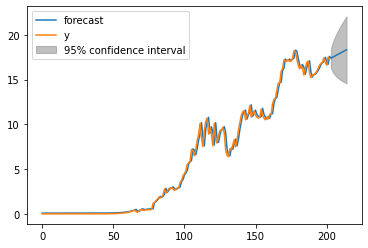

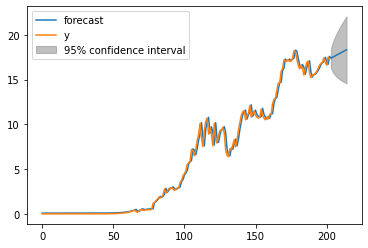

In [51]:
# fit model
train_model = ARIMA(X, order=(0,1,0))
train_model_fit=train_model.fit()
forecast=train_model_fit.forecast(steps=10)[0]
train_model_fit.plot_predict(1, 215)


In [44]:
#Error on the test data
val=pd.read_csv('/content/validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
print('RMSE: %.3f' % rmse)

RMSE: 2.148


# **Combine train and test data and build final model**

In [55]:
# fit model
data = pd.read_excel('/content/CO2 dataset.xlsx',
                     header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

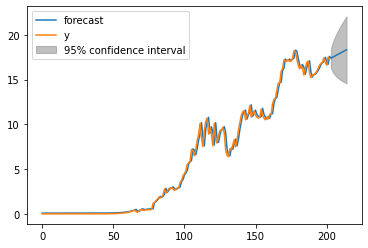

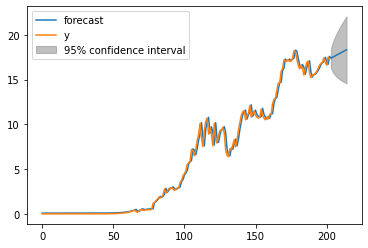

In [58]:
final_model = ARIMA(X, order=(0,1,0))
final_model_fit = final_model.fit()
forecast=final_model_fit.forecast(steps=15)[0]
final_model_fit.plot_predict(1,215)

In [ ]:
forecast

**FORECASTED VALUES FOR NEXT 15 YEARS:**
*   2015-->17.38519327
*   2016-->17.47038731
*   2017-->17.55558134
*   2018-->17.64077538
*   2019-->17.72596942
*   2020-->17.81116345
*   2021-->17.89635749
*   2022-->17.98155152
*   2023-->18.06674556
*   2024-->18.15193959
*   2025-->18.23713363
*   2026-->18.32232766
*   2027-->18.4075217
*   2028-->18.49271574
*   2029-->18.57790977

**AUTOMATE THE EDA PROCESS**

In [ ]:
##!pip uninstall pandas-profiling

In [ ]:
##!pip install pandas_profiling==2.7.1
##!pip install sweetviz

In [59]:
# importing pandas_profiling
##import pandas_profiling as pp

# importing sweetviz
#import sweetviz as sv

In [ ]:
## profiling the EDA report
#EDA_report = pp.ProfileReport(data)

#export the report
#EDA_report.to_file(output_file='AIR_QUALITY_EDA_Report.html')

In [ ]:
#analyzing the dataset
#sweet_report=sv.analyze(data)

#display the report#
#sweet_report.show_html('AIR_QUALITY_SWEETVIZ_Report.html')